# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
# from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print(f'Household Income: {df_hh_income.columns}')
print(f'Pct Below Poverty Level: {df_pct_poverty.columns}')
print(f'Over 25 Who Completed High School: {df_pct_completed_hs.columns}')
print(f'Share of Race by City: {df_share_race_city.columns}')
print(f'Fatalities: {df_fatalities.columns}')

Household Income: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Pct Below Poverty Level: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Over 25 Who Completed High School: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Share of Race by City: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Fatalities: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
print(f'Household Income: {df_hh_income.isna().values.any()}')
print(f'Pct Below Poverty Level: {df_pct_poverty.isna().values.any()}')
print(f'Over 25 Who Completed High School: {df_pct_completed_hs.isna().values.any()}')
print(f'Share of Race by City: {df_share_race_city.isna().values.any()}')
print(f'Fatalities: {df_fatalities.isna().values.any()}')

# There are missing values in the fatalities and pct below poverty level datasets

Household Income: True
Pct Below Poverty Level: False
Over 25 Who Completed High School: False
Share of Race by City: False
Fatalities: True


In [8]:
print(f'Household Income: {df_hh_income.duplicated().values.any()}')
print(f'Pct Below Poverty Level: {df_pct_poverty.duplicated().values.any()}')
print(f'Over 25 Who Completed High School: {df_pct_completed_hs.duplicated().values.any()}')
print(f'Share of Race by City: {df_share_race_city.duplicated().values.any()}')
print(f'Fatalities: {df_fatalities.duplicated().values.any()}')

# No duplicated values in all the datasets

Household Income: False
Pct Below Poverty Level: False
Over 25 Who Completed High School: False
Share of Race by City: False
Fatalities: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [9]:
# Household Income Missing values
print(f'Household Income: {df_hh_income.isna().values.sum()} Missing values')

# Fatalities Missing values
print(f'Fatalities: {df_fatalities.isna().values.sum()} Missing values')

Household Income: 51 Missing values
Fatalities: 346 Missing values


In [10]:
# Income missing values per column
df_hh_income.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [11]:
# Fatalities missing values per column
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [12]:
df_hh_income[df_hh_income['Median Income'] == '(X)'].count()

Geographic Area    1113
City               1113
Median Income      1113
dtype: int64

In [13]:
# Substitute missing values with 0 -- Naaaaah
# For Household Income, I'd rather use '(X)' since it has also been used in other rows
df_hh_income.fillna(value='(X)', inplace = True)

# The same too for the fatalities dataset instead of just a 0
df_fatalities.fillna(value='(X)', inplace = True)

In [14]:
df_fatalities.isna().values.any()
df_hh_income.isna().values.any()

False

In [15]:
df_hh_income[df_hh_income['Median Income'] == '(X)'].count()

Geographic Area    1164
City               1164
Median Income      1164
dtype: int64

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [16]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [17]:
df_pct_poverty[df_pct_poverty.poverty_rate == '-'].count()

# There are '-' values present in poverty rate

Geographic Area    201
City               201
poverty_rate       201
dtype: int64

In [18]:
# Best option is to drop rows with '-' as their poverty rate
dropped_pct_poverty = df_pct_poverty[df_pct_poverty.poverty_rate != '-'].copy()
dropped_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29128 non-null  object
 1   City             29128 non-null  object
 2   poverty_rate     29128 non-null  object
dtypes: object(3)
memory usage: 910.2+ KB


In [19]:
# Convert poverty rate from string to float
dropped_pct_poverty['poverty_rate'] = dropped_pct_poverty.poverty_rate.astype(float)
dropped_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29128 non-null  object 
 1   City             29128 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.2+ KB


In [20]:
# Create a dataframe containing the average poverty rates per state
poverty_per_state = dropped_pct_poverty.groupby(by='Geographic Area', as_index=False).\
    agg(Poverty_Rate_Per_State=('poverty_rate', 'mean'))
poverty_per_state

,Geographic Area,Poverty_Rate_Per_State
0,AK,19.85
1,AL,20.65
2,AR,22.96
3,AZ,25.67
4,CA,17.12
5,CO,13.36
6,CT,9.14
7,DC,18.00
8,DE,12.56
9,FL,17.57


In [21]:
px.bar(data_frame=poverty_per_state, x='Geographic Area', y='Poverty_Rate_Per_State')
# MS apparently has the highest poverty rate overall
# NJ has the lowest poverty rate

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [22]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [23]:
df_pct_completed_hs[df_pct_completed_hs == '-'].count()

# There are '-' values present in graduation rate

Geographic Area           0
City                      0
percent_completed_hs    197
dtype: int64

In [24]:
dropped_grad_rate = df_pct_completed_hs[df_pct_completed_hs.percent_completed_hs != '-'].copy()
dropped_grad_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29132 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29132 non-null  object
 1   City                  29132 non-null  object
 2   percent_completed_hs  29132 non-null  object
dtypes: object(3)
memory usage: 910.4+ KB


In [25]:
dropped_grad_rate['percent_completed_hs'] = dropped_grad_rate.percent_completed_hs.astype(float)
dropped_grad_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29132 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29132 non-null  object 
 1   City                  29132 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.4+ KB


In [26]:
grad_per_state = dropped_grad_rate.groupby(by='Geographic Area', as_index=False).\
    agg(Grad_Rate_Per_State=('percent_completed_hs', 'mean'))
grad_per_state.head()

,Geographic Area,Grad_Rate_Per_State
0,AK,84.63
1,AL,80.30
2,AR,79.95
3,AZ,80.47
4,CA,81.96


In [27]:
px.bar(data_frame=grad_per_state, x='Geographic Area', y='Grad_Rate_Per_State')

# All the graduation rates are pretty high in all the states

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [28]:
dfs = {"Grad_Rate_Per_State" : grad_per_state, "Poverty_Rate_Per_State": poverty_per_state}

# plot the data
fig = go.Figure()

for i in dfs:
    fig = fig.add_trace(go.Scatter(x = dfs[i]['Geographic Area'], y = dfs[i][i], name = i))
    
fig.update_layout(title='Relationship between Poverty Rates and High School Graduation Rates')
fig.show()

# Where there is a spike in poverty rates, there is a drop in graduation rates and vice versa
# Basically, where there are more poor people, the less they end up graduating

In [29]:
grad_poverty_per_state = poverty_per_state.merge(grad_per_state)
grad_poverty_per_state.head()

,Geographic Area,Poverty_Rate_Per_State,Grad_Rate_Per_State
0,AK,19.85,84.63
1,AL,20.65,80.30
2,AR,22.96,79.95
3,AZ,25.67,80.47
4,CA,17.12,81.96


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

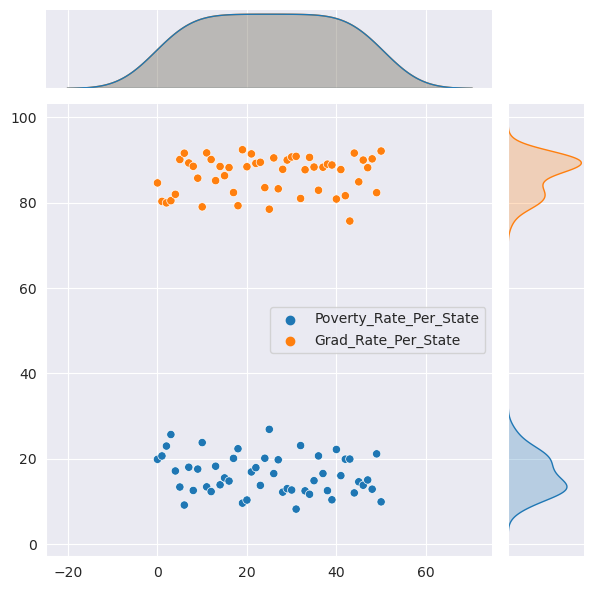

In [30]:
sns.set_style('darkgrid')
sns.jointplot(grad_poverty_per_state)

In [31]:
# Now to create a column containing ratios of poverty to grad in decimal form
grad_poverty_per_state['Grad_Poverty_Ratio'] = \
    grad_poverty_per_state['Poverty_Rate_Per_State'] / grad_poverty_per_state['Grad_Rate_Per_State']
grad_poverty_per_state.describe()

,Poverty_Rate_Per_State,Grad_Rate_Per_State,Grad_Poverty_Ratio
count,51.00,51.00,51.00
mean,16.24,86.50,0.19
std,4.56,4.38,0.06
min,8.19,75.69,0.09
25%,12.61,82.64,0.14
50%,15.50,88.23,0.18
75%,19.90,90.05,0.24
max,26.88,92.40,0.34


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Axes: title={'center': 'Linear Regression Relationship between Poverty and High School Graduation Rates'}, xlabel='Poverty_Rate_Per_State', ylabel='Grad_Rate_Per_State'>

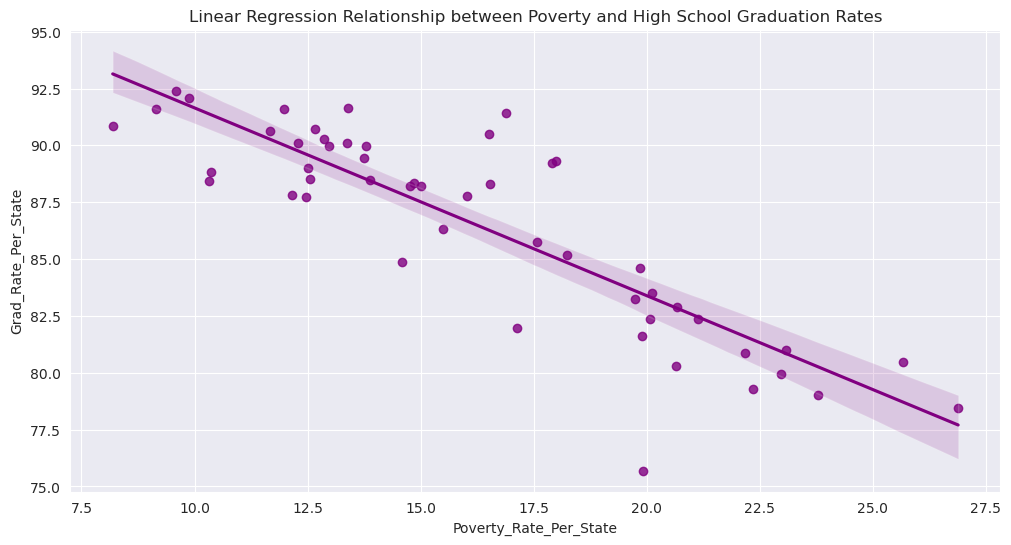

In [32]:
plt.figure(figsize=(12, 6))
plt.title('Linear Regression Relationship between Poverty and High School Graduation Rates')
sns.regplot(grad_poverty_per_state, x='Poverty_Rate_Per_State', y='Grad_Rate_Per_State', color='purple')

# The relationship is indirectly proportional

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [33]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [34]:
# Check for rows with (X) values
df_share_race_city[df_share_race_city == '(X)'].count()

Geographic area           0
City                      0
share_white              20
share_black              20
share_native_american    20
share_asian              20
share_hispanic           20
dtype: int64

In [35]:
share_race_city = df_share_race_city[df_share_race_city.share_black != '(X)'].copy()
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29248 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29248 non-null  object
 1   City                   29248 non-null  object
 2   share_white            29248 non-null  object
 3   share_black            29248 non-null  object
 4   share_native_american  29248 non-null  object
 5   share_asian            29248 non-null  object
 6   share_hispanic         29248 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB


In [36]:
col_to_convert = share_race_city.columns[2:]
share_race_city[col_to_convert] = share_race_city[col_to_convert].astype(float)
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29248 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29248 non-null  object 
 1   City                   29248 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


In [37]:
race_per_state = share_race_city.groupby('Geographic area', as_index=False).mean(numeric_only=True)
race_per_state.head(10)

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


In [38]:
traces = []
for group in race_per_state.iloc[:, 1:]:
    trace = go.Bar(x=race_per_state['Geographic area'], y=race_per_state[group], name=group.replace('_', ' ').title())
    traces.append(trace)

# Create the stacked bar chart
fig = go.Figure(data=traces)

# Update the layout
fig.update_layout(
    barmode='stack',
    title='Racial Distribution by State',
    xaxis_title='State',
    yaxis_title='Share of Population',
    legend=dict(title='Racial Group'),
)

# Show the chart
fig.show()

# Majority of Amreicans are white in each state except in DC which has more black people while AK has more native Americans

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [39]:
df_fatalities.race.value_counts()

W      1201
B       618
H       423
(X)     195
A        39
N        31
O        28
Name: race, dtype: int64

In [40]:
fatality_by_race = df_fatalities[df_fatalities.race != '(X)'].copy()
race_fatalities = pd.DataFrame(fatality_by_race.race.value_counts())
race_fatalities.rename(columns={'race': 'Race'}, inplace=True)
race_fatalities

,Race
W,1201
B,618
H,423
A,39
N,31
O,28


In [41]:
fig = go.Figure(data=[go.Pie(labels=race_fatalities.index, values=race_fatalities.Race, hole=0.5)])
fig.update_layout(title='Donut Chart of People Killed By Race', legend=dict(title='Race'))

# Majority of people killed by police were white people

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [42]:
gender_fatalities = df_fatalities['gender'].value_counts()
gender_fatalities

M    2428
F     107
Name: gender, dtype: int64

In [43]:
fig = go.Figure(data=[go.Pie(labels=gender_fatalities.index, values=gender_fatalities.values, hole=0.5)])
fig.update_layout(title='Donut Chart of People Killed By Gender', legend=dict(title='Gender'))

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [44]:
fig = px.box(data_frame=df_fatalities[df_fatalities.age != '(X)'], x='manner_of_death', y='age', color='gender')
fig.update_layout(title='Boxplot showing Gender, Age and Manner of Death', legend=dict(title='Manner of Death'),
                  xaxis_title='Gender', yaxis_title='Age')
fig.show()

# Median number of people shot were in their mid 30s
# The oldest shot was 91 years old while the youngest was 6

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [45]:
armed_count = df_fatalities[df_fatalities.armed != '(X)'].armed.value_counts()
armed_count.head(10)

# Majority of the police were armed with guns

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
machete             18
unknown weapon      18
ax                   9
Taser                9
Name: armed, dtype: int64

In [46]:
fig = go.Figure(data=[go.Pie(labels=armed_count.index, values=armed_count.values)])
fig.update_traces(textinfo='none')
fig.update_layout(title='Pie Chart of Weapons used to kill', legend=dict(title='Weapon'),
                  height=650)

# 6.77% of the police were unarmed while 55.3% were armed with guns

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [47]:
age_fatalities = df_fatalities[df_fatalities.age != '(X)'].copy()
age_fatalities.age.info()

<class 'pandas.core.series.Series'>
Int64Index: 2458 entries, 0 to 2534
Series name: age
Non-Null Count  Dtype 
--------------  ----- 
2458 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB


In [48]:
# Find percentage while using all the fatalities whose ages were known
underage_count = age_fatalities[age_fatalities.age < 25].age.count()
all_count = age_fatalities.age.count()
print(f'Percentage of people killed under 25 years old: {round((underage_count / all_count) * 100, 2)}%')

Percentage of people killed under 25 years old: 18.31%


In [49]:
age_fatalities['age'] = age_fatalities.age.astype(int)
age_fatalities.age.info()

<class 'pandas.core.series.Series'>
Int64Index: 2458 entries, 0 to 2534
Series name: age
Non-Null Count  Dtype
--------------  -----
2458 non-null   int64
dtypes: int64(1)
memory usage: 38.4 KB


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [50]:
px.histogram(data_frame=age_fatalities, x='age', title='Distribution of Ages of People Killed by Police with Plotly')

# Majority of People killed

<Axes: title={'center': 'Distribution of Ages of People Killed by Police with Seaborn'}, xlabel='Age', ylabel='Count'>

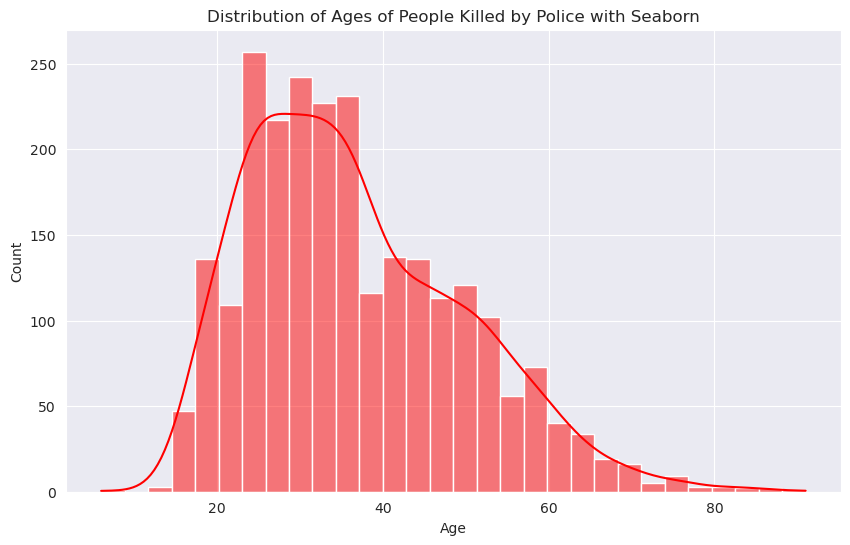

In [51]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Ages of People Killed by Police with Seaborn')
plt.xlabel('Age')
sns.histplot(data=age_fatalities, x='age', kde=True, color='red', bins=30)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<Axes: title={'center': 'Age and Race Distributions of People Killed by the Police'}, xlabel='age', ylabel='Density'>

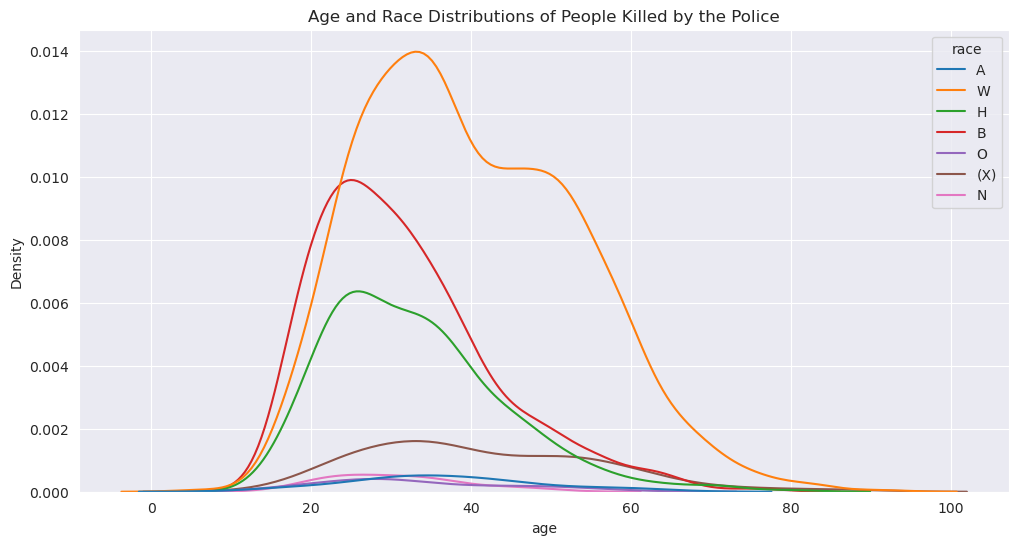

In [52]:
plt.figure(figsize=(12, 6))
plt.title('Age and Race Distributions of People Killed by the Police')
sns.kdeplot(data=age_fatalities, x='age', hue='race')

# Most black and hispanic people killed were in their 20s 
# While the whites were in their 30s

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [65]:
px.bar(x=race_fatalities.index, y=race_fatalities.Race, title='Total number of people killed by Race')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [92]:
mental_fatalities_count = df_fatalities['signs_of_mental_illness'].value_counts()
print(f'Percentage of mental illness killings: {round(mental_fatalities_count[1] / (mental_fatalities_count[0] + mental_fatalities_count[1]) * 100, 2)}')

Percentage of mental illness killings: 24.97


In [95]:
fig = go.Figure(data=[go.Pie(labels=mental_fatalities_count.index, values=mental_fatalities_count.values, hole=0.5)])
fig.update_layout(title='Mental Illness and Police Killings', legend=dict(title='Signs of Mental Illness'))

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [140]:
top_10_cities = df_fatalities.city.value_counts()[:10]
top_10_cities

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

In [141]:
fig = px.bar(x=top_10_cities.index, y=top_10_cities.values, title='Cities with the most Police Killings')
fig.update_layout(xaxis_title='Cities', yaxis_title='Number of Killings')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [149]:
top_10_fatality = fatality_by_race[fatality_by_race['city'].isin(top_10_cities.index)]
race_city_fatality = top_10_fatality.groupby(by=['city', 'race'], as_index=False).agg(Race_Count_Per_City=('race', 'count'))
race_city_fatality

,city,race,Race_Count_Per_City
0,Austin,B,3
1,Austin,H,2
2,Austin,W,13
3,Chicago,B,21
4,Chicago,H,1
5,Chicago,W,2
6,Columbus,B,11
7,Columbus,O,1
8,Columbus,W,6
9,Houston,A,1


In [158]:
fig = go.Figure()

# Loop through unique race values in your DataFrame
for race in race_city_fatality['race'].unique():
    # Filter the data for each race
    race_data = race_city_fatality[race_city_fatality['race'] == race]
    
    # Add a trace for each race
    fig.add_trace(go.Bar(x=race_data['city'], y=race_data['Race_Count_Per_City'], name=race))

# Update the layout
fig.update_layout(
    barmode='stack',
    title='Racial Distribution in the top 10 cities',
    xaxis_title='City',
    yaxis_title='Number of Killings',
    legend=dict(title='Racial Group'),
)

# Show the chart
fig.show()


# Most of the black people killed were in Chicago
# While most of the hispanic killings were in Los Angeles

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [169]:
state_fatalities = pd.DataFrame(df_fatalities.state.value_counts())
state_fatalities.rename(columns={'state': 'State Fatalities Count'}, inplace=True)
state_fatalities.head()

,State Fatalities Count
CA,424
TX,225
FL,154
AZ,118
OH,79


In [177]:
data = dict(type='choropleth', locations=state_fatalities.index, locationmode='USA-states',
            colorscale='Portland', z=state_fatalities['State Fatalities Count'], colorbar={'title': 'Police Killings Per State'})
layout = dict(geo={'scope':'usa'})

In [178]:
go.Figure(data=[data], layout=layout)

# CA looks like a pretty dangerous state to be in
# No direct relationship between degrees of poverty and number of killings in each state

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [179]:
df_fatalities['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2535 entries, 0 to 2534
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
2535 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [180]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], utc=True)
df_fatalities.date.head()

0   2015-02-01 00:00:00+00:00
1   2015-02-01 00:00:00+00:00
2   2015-03-01 00:00:00+00:00
3   2015-04-01 00:00:00+00:00
4   2015-04-01 00:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]

In [207]:
killings_over_time = df_fatalities.groupby(by='date', as_index=False).agg(Count=('date', 'count'))
killings_over_time.rename(columns={'date': 'Date'}, inplace=True)
killings_over_time.head()

,Date,Count
0,2015-01-03 00:00:00+00:00,3
1,2015-01-04 00:00:00+00:00,2
2,2015-01-06 00:00:00+00:00,1
3,2015-01-07 00:00:00+00:00,2
4,2015-01-08 00:00:00+00:00,2


In [208]:
px.line(data_frame=killings_over_time, x='Date', y='Count')

# Past July 2017, it seems like killings weren't as much as before

In [210]:
rolled_killings = killings_over_time.set_index('Date').rolling(6).mean()
rolled_killings.reset_index(inplace=True)
rolled_killings.head(10)

,Date,Count
0,2015-01-03 00:00:00+00:00,NaN
1,2015-01-04 00:00:00+00:00,NaN
2,2015-01-06 00:00:00+00:00,NaN
3,2015-01-07 00:00:00+00:00,NaN
4,2015-01-08 00:00:00+00:00,NaN
5,2015-01-09 00:00:00+00:00,2.17
6,2015-01-11 00:00:00+00:00,2.17
7,2015-01-12 00:00:00+00:00,2.17
8,2015-01-13 00:00:00+00:00,2.33
9,2015-01-14 00:00:00+00:00,3.00


In [204]:
px.line(data_frame=rolled_killings, x='Date', y='Count')

In [211]:
df_fatalities['year'] = df_fatalities.date.apply(lambda x: x.year)
df_fatalities.year.head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: int64

In [213]:
yearly_fatalities = df_fatalities.groupby('year', as_index=False).agg(Yearly_Count=('year', 'count'))
yearly_fatalities

,year,Yearly_Count
0,2015,991
1,2016,963
2,2017,581


Text(0, 0.5, 'Yearly Number of Killings')

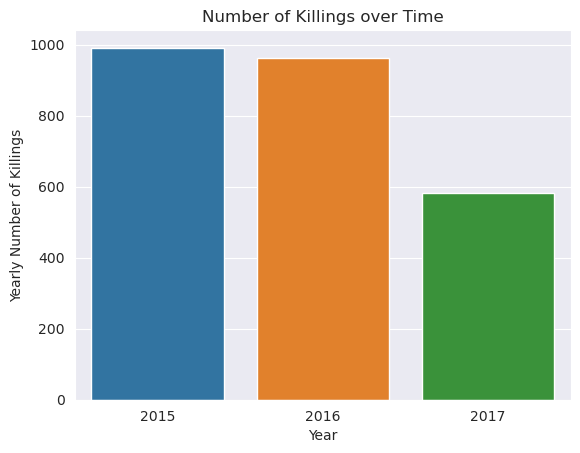

In [219]:
plt.title('Number of Killings over Time')
sns.barplot(data=yearly_fatalities, x='year', y='Yearly_Count')
plt.xlabel('Year')
plt.ylabel('Yearly Number of Killings')

# Number of killings in 2017 were lower than the other years

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).